<a href="https://colab.research.google.com/github/PszczeIarz/Test1/blob/main/ML_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import libs



In [95]:
import sys
import sklearn as sk
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get The Data 

In [96]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [97]:
fetch_housing_data()


In [98]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [99]:
housing = load_housing_data()   #housing is a pandas type variable
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [101]:
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [102]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


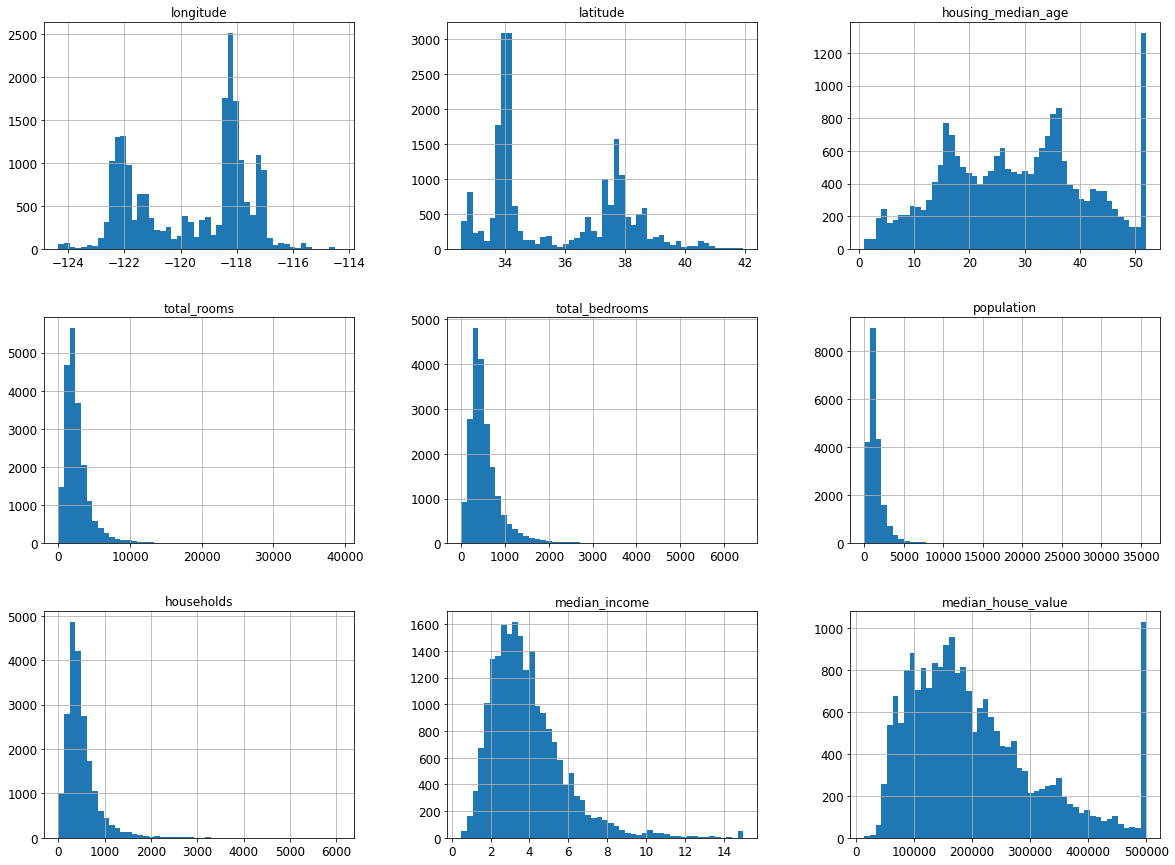

In [103]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

Create a test set



In [104]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing, test_size=0.2,random_state=40)

In [105]:
test_set.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
18912,-122.24,38.15,10.0,6817.0,1188.0,4163.0,1135.0,4.4529,144100.0,NEAR BAY
16870,-122.41,37.61,43.0,1934.0,303.0,847.0,300.0,4.7381,347400.0,NEAR OCEAN
9093,-118.27,34.68,19.0,552.0,129.0,314.0,106.0,3.2125,185400.0,INLAND
5542,-118.40,33.98,39.0,714.0,118.0,314.0,117.0,5.9856,432100.0,<1H OCEAN
10322,-117.76,33.87,16.0,3182.0,429.0,1663.0,428.0,7.0592,288200.0,<1H OCEAN


view the income in California



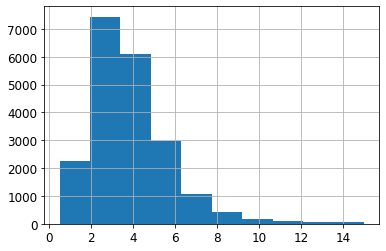

In [106]:
housing["median_income"].hist()

In [107]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [108]:
housing["income_cat"].value_counts()


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

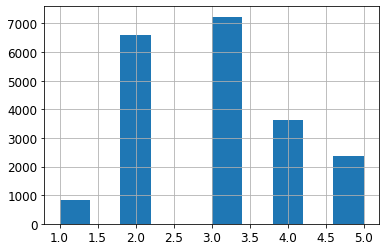

In [109]:
housing["income_cat"].hist()


In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [111]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

setting the data back to original



In [112]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

Discover and Visualize the Data to gain insight



In [113]:
train_set.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN


In [114]:
housing = strat_train_set.copy()


Visualizing Geographical Data



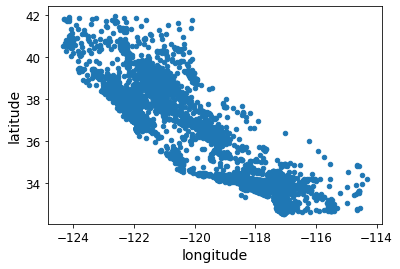

In [115]:
housing.plot(kind="scatter",x="longitude", y= "latitude")


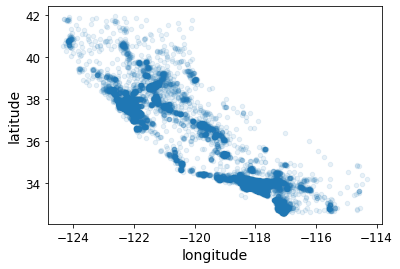

In [116]:
housing.plot(kind="scatter",x="longitude", y= "latitude",alpha=0.1)


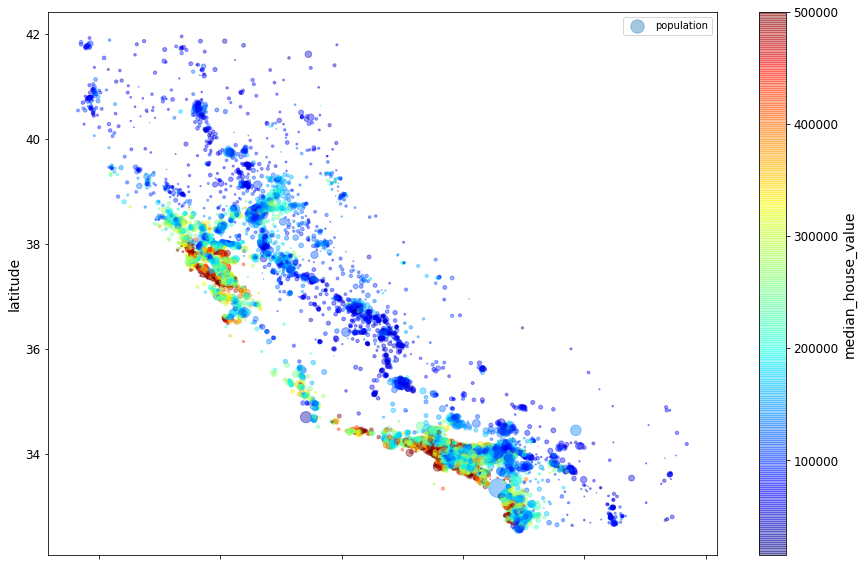

In [117]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(15,10),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)


plt.legend()

**with help from the image above, we can see that the price of the house has a strong connection to its geographical location in California.**

Lets try to show the heat map we created on top of the California map. first, lets download a picture of California.

In [118]:
# Download the California image
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f8eaf223650>)

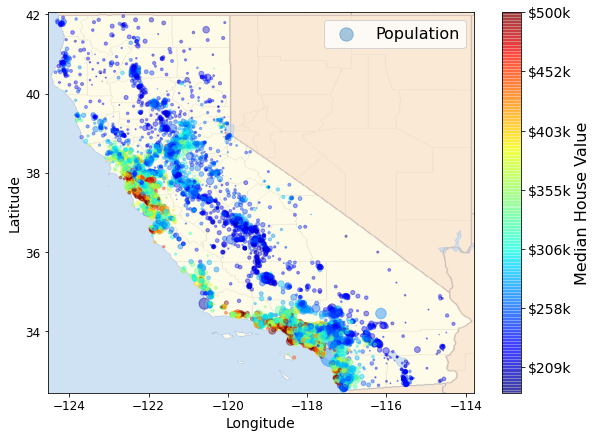

In [119]:
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(images_path, filename))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)

# creating a color bar in order to explain the heat colors in the picture.
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

# Dealing with attributes combinations


Some of the attributes have a tail-heavy distribution, we would like to transform them to something reflective and effective.

In [120]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [121]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
print(corr_matrix)

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105823   
latitude                  -0.924478  1.000000            0.005737   
housing_median_age        -0.105823  0.005737            1.000000   
total_rooms                0.048909 -0.039245           -0.364535   
total_bedrooms             0.076686 -0.072550           -0.325101   
population                 0.108071 -0.115290           -0.298737   
households                 0.063146 -0.077765           -0.306473   
median_income             -0.019615 -0.075146           -0.111315   
median_house_value        -0.047466 -0.142673            0.114146   
rooms_per_household       -0.028374  0.107665           -0.147184   
bedrooms_per_rooms         0.095645 -0.116955            0.136768   
population_per_household  -0.000415  0.005426            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude            

From the matrix above we can learn that houses with lower bedroom per room ratio tend to be more expensive.



# Data Cleaning

In [122]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [123]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")   # let the imputer take care of the missing values in the data by replacing it with the median value of each culomn.

#drop the not number values so the imputer can run on the data.
housing_numbers = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_numbers)    # fit the imputer with our numeric data

print(imputer.statistics_)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [124]:
# converting back to pandas data frame
X = imputer.transform(housing_numbers)
housing_pd = pd.DataFrame(X,columns= housing_numbers.columns)
print(housing_pd.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.46     38.52                29.0       3873.0           797.0   
1    -117.23     33.09                 7.0       5320.0           855.0   
2    -119.04     35.37                44.0       1618.0           310.0   
3    -117.13     32.75                24.0       1877.0           519.0   
4    -118.70     34.28                27.0       3536.0           646.0   
5    -122.04     37.96                28.0       1207.0           252.0   
6    -122.03     37.33                23.0       4221.0           671.0   
7    -118.31     34.20                36.0       1692.0           263.0   
8    -121.95     37.27                17.0       1330.0           271.0   
9    -118.28     34.02                29.0        515.0           229.0   

   population  households  median_income  
0      2237.0       706.0         2.1736  
1      2015.0       768.0         6.3373  
2       667.0       300.0         2.8750  
3 

In [125]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


# Converting text to numbers


In [126]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# converting the text data into numbers using Ordinal Encoder
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]   # head(10)

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [127]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

A better way to handle text variables is shown below.



In [128]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [129]:
# converting SciPy sparse back to NumPy array 
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [130]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 
 def fit(self, X, y=None):
  return self # nothing else to do
 
 def transform(self, X, y=None):
  rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
  population_per_household = X[:, population_ix] / X[:, households_ix]

  if self.add_bedrooms_per_room:

    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]

  else:
    return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#Select and Train a Model
Training and Evaluating on the Training set

In [131]:
# Trying the Linear Regressor Model

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()  
X_train, X_test, y_train, y_test = train_test_split(housing_pd, housing_labels, test_size=0.2) 
linear_reg.fit(X_train, y_train)   # providing Data , X= housing, Y= housing_lables

LinearRegression()

In [132]:
from sklearn.metrics import mean_squared_error

housing_predictions = linear_reg.predict(X_test)   # testing the model on the WHOLE data
print(y_test[:20])

17020    391000.0
15121    161000.0
2964     106200.0
7615     117700.0
15309    197900.0
5074     106600.0
4211     277300.0
13820    170900.0
11248    146300.0
3435     136400.0
16604    195200.0
15638    380000.0
6141     162500.0
5001      99300.0
2165      68100.0
12181    101300.0
19932    133800.0
7414     152800.0
16396    125000.0
4521     135300.0
Name: median_house_value, dtype: float64


In [133]:
print(housing_predictions[:20])


[307802.49486526 246206.62821621 187185.59134412 187056.21392694
 172445.82993732 170545.94805262 258098.32974911 167154.05274701
 203920.51742714 102756.34880276 244188.46572642 271513.43956738
 139559.93848501 145072.38257128 116116.97045379  91044.27445385
 194957.62584048 149038.96743625 109599.10726379 132190.23131475]


In [134]:
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68013.05621920497

It might be better than nothing, but we want to test more Models to see if we can reach a better result. btw, we can see here a perfect example of Underfitting. since the median_house_value range between 120,000 to 256,000, a prediction error of 71,842$ is not that satisfying.


**Decision Tree Regressor Model**

In [135]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X= X_train,y=  y_train)       # training the model with the test Data.

DecisionTreeRegressor()

In [136]:
housing_prediction = dec_tree_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69741.5782996355

As we can see, both Decision tree and Linear regressor generating not so good results with the current data.

Now we wil try the last Model for this project, RandomForestRegressor Model.

In [137]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)    # training the data

forest_predictions = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

49550.69055329531

Conclusion
During the project we tried to predict the median value for houses in California, USA. first, we get to know our Data better, which is a very important step in the path of understanding the problem we facing.

After understanding the problem and the tools we have in our hands (The given data) we started to Clean The Data from noise, i.e finding the best solutions for Null values and for non-numbers values.

In the moment we had our Data cleaned and the problem was bright as sun we started to search for the best Model for the Data and for the Problem.

we tried Linear, Decision Tree and Random Forest Models (Regression) and found that the best out of the trre were Random Forest Regressor.